In [1]:
from dev_model_proto import *
from scipy.special import comb
import matplotlib.pyplot as plt
import numpy as np
import jax
import jax.numpy as jnp

In [2]:
Ss

array([1.  , 0.7 , 0.6 , 0.8 , 0.5 , 0.3 , 0.2 , 0.1 , 0.4 , 0.05])

In [3]:
n_possible_prey = len(Ss)
n_possible_prey

10

In [4]:
n_k = np.array([int(comb(n_possible_prey, k)) for k in range(1, n_possible_prey + 1)])
x = np.arange(n_possible_prey) + 1
n_k

array([ 10,  45, 120, 210, 252, 210, 120,  45,  10,   1])

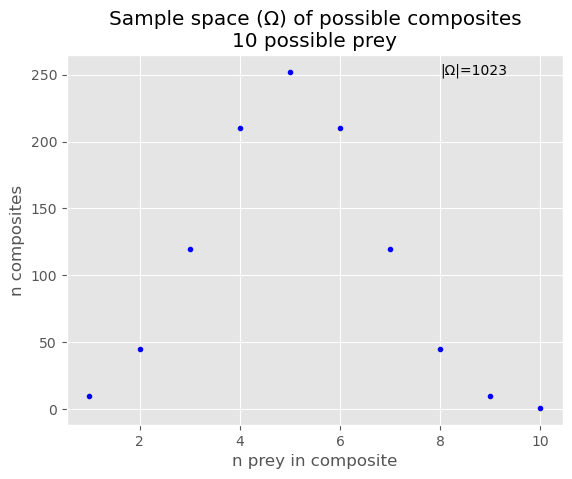

In [5]:

def plot_sample_space(Ss):
    
    n_possible_prey = len(Ss)
    n_k = np.array([int(comb(n_possible_prey, k)) for k in range(1, n_possible_prey + 1)])
    x = np.arange(n_possible_prey) + 1
    
    plt.style.use('ggplot')
    plt.plot(x, n_k, 'b.')
    plt.xlabel('n prey in composite')
    plt.ylabel('n composites')
    plt.title((f"Sample space ("u"\u03A9"
              f") of possible composites"
              f"\n{n_possible_prey} possible prey"))


    text = u'|\u03A9|=' + f"{sum(n_k)}"
    plt.text(8, 250, text)
    plt.show()
    
mp.plot_sample_space(Ss)

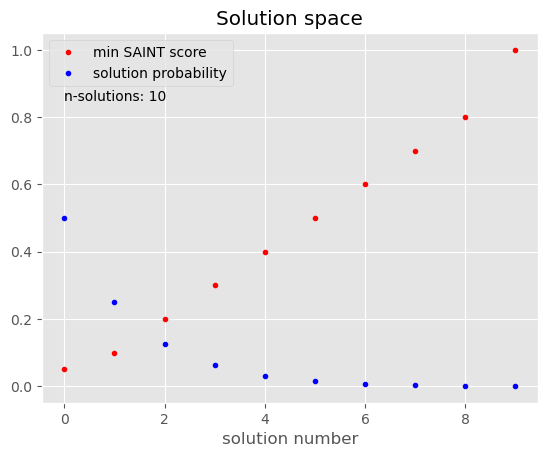

In [6]:
def plot_solution_space(Ss):
    outcome_frequency, score_set = mp.enumerate_Ss(Ss)
    n_solutions = len(set(Ss))
    n_total_outcomes = sum(outcome_frequency)
    solution_probability = outcome_frequency / n_total_outcomes
    plt.style.use('ggplot')
    plt.title('Solution space')
    plt.plot(score_set, 'r.', label='min SAINT score')
    plt.plot(solution_probability, 'b.', label='solution probability')
    plt.xlabel('solution number')
    text = f"n-solutions: {n_solutions}"
    plt.legend()
    plt.text(0, 0.85, text)
    
mp.plot_solution_space(Ss)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


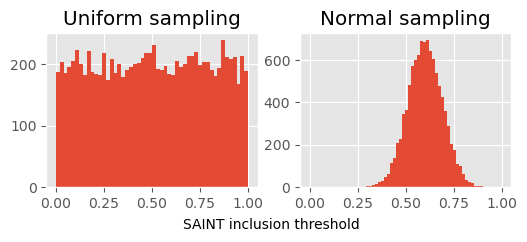

In [7]:
# 1 sample ts
# 2 construct a composite
# 3 
# 3 plot the log score

def plot_samples(Ss):


    lpmf = mp.log_pdf_Cs__Ss_ts_builder(Ss)

    n_examples = 10000

    key = jax.random.PRNGKey(13)
    k1, k2, k3 = jax.random.split(key, 3)
    ts_unif = jax.random.uniform(k1, shape=(n_examples,))
    ts_norm = 0.6 + jax.random.normal(k2, shape=(n_examples,))*0.09
    ts_60 = jax.random.uniform(k3, minval=0.59, maxval=1.0, shape=(n_examples,))

    uniform_scores = [lpmf(mp.C(Ss, t_unif), Ss) for t_unif in ts_unif]
    normal_scores = [lpmf(mp.C(Ss, t_norm), Ss) for t_norm in ts_norm]
    uniform_60_scores = [lpmf(mp.C(Ss, t_60), Ss) for t_60 in ts_60]

    w = 6
    h = 2
    nbins = 50
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=False,
                          figsize=(w, h))
    plt.style.use('ggplot')

    plt.subplot(121)
    plt.title('Uniform sampling')
    plt.hist(np.array(ts_unif), bins=nbins)
    plt.subplot(122)
    plt.title('Normal sampling')
    plt.hist(np.array(ts_norm), bins=nbins)
    fig.text(0.5, -0.1, 'SAINT inclusion threshold', ha='center')
    plt.show()
    
mp.plot_samples(Ss)

NameError: name 'nbins' is not defined

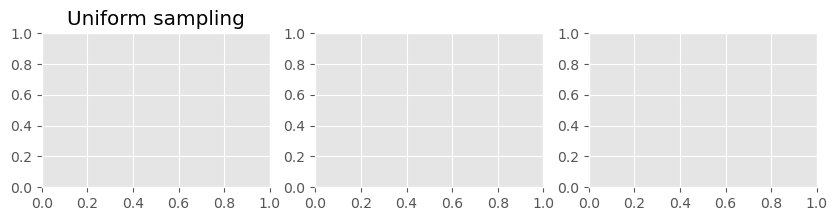

In [8]:
def plot_triple_samples(Ss):
    
    lpmf = mp.log_pdf_Cs__Ss_ts_builder(Ss)

    n_examples = 10000

    key = jax.random.PRNGKey(13)
    k1, k2, k3 = jax.random.split(key, 3)
    ts_unif = jax.random.uniform(k1, shape=(n_examples,))
    ts_norm = 0.6 + jax.random.normal(k2, shape=(n_examples,))*0.09
    ts_60 = jax.random.uniform(k3, minval=0.59, maxval=1.0, shape=(n_examples,))

    uniform_scores = [lpmf(mp.C(Ss, t_unif), Ss) for t_unif in ts_unif]
    normal_scores = [lpmf(mp.C(Ss, t_norm), Ss) for t_norm in ts_norm]
    uniform_60_scores = [lpmf(mp.C(Ss, t_60), Ss) for t_60 in ts_60]
    
    
    
    w=10
    h = 2
    fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=False,
                          figsize=(w, h))
    plt.style.use('ggplot')

    plt.subplot(131)
    plt.title('Uniform sampling')
    plt.hist(np.array(uniform_scores), bins=nbins)
    plt.subplot(132)
    plt.title('Normal sampling')
    plt.hist(np.array(normal_scores), bins=nbins)
    plt.subplot(133)
    plt.title('Uniform Sampling (0.59, 1.0]')
    plt.hist(np.array(uniform_60_scores), bins=nbins)
    fig.text(0.5, -0.1, 'Composite identity score', ha='center')
    fig.text(0.03, 0.5, 'frequency', va='center', rotation='vertical')
    plt.show()
    
mp.plot_triple_samples(Ss)

In [ ]:
def plot_score_saint(Ss):
    lpmf = mp.log_pdf_Cs__Ss_ts_builder(Ss)
    ts = np.arange(0, 1, 0.01)
    lpmfs = [lpmf(mp.C(Ss, t), Ss) for t in ts]
    plt.plot(ts, lpmfs)
    plt.xlabel('SAINT threshold')
    plt.ylabel('Score')
    
mp.:plot_score_saint(Ss)

In [ ]:
ss = np.array([0.6, 0.6, 0.7, 0.7, 0.59, 0.62, 0.8, 0.8, 0.8, 0.8, 1.0, 0.97, 0.54, 0.93, 0.71, 0.64, 0.88,
              0.43, 0.66, 0.74, 0.57, 0.84, 0.32, 0.87, 0.92, 0.61, 0.7, 0.7, 0.7, 0.63, 0.63])

plot_sample_space(ss)

In [ ]:
plot_solution_space(ss)

In [ ]:
plot_samples(ss)

In [ ]:
plot_triple_samples(ss)

In [ ]:
plot_score_saint(ss)